In [51]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
!pip install ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [181]:
#dataset apo selida me themata politikous, skopos einai na vroume tous katallhlous kombous wste na megistopoihsoume tin epiroi
#stis epomenes ekloges
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)
V=nx.barabasi_albert_graph(4039, 22, seed=None)

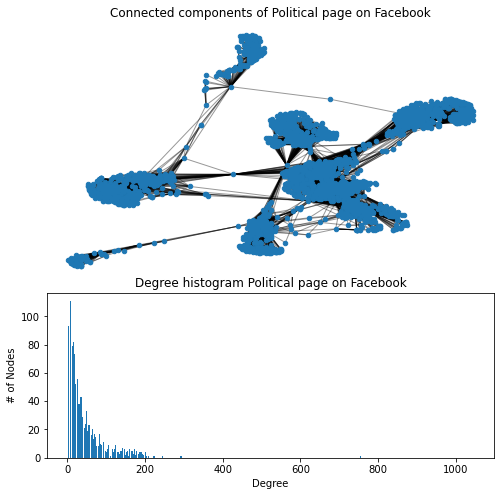

In [132]:
#fainetai na akolouthei kai autos o grafos tin powerlaw katanomi kai na exei ta idia xaraktiristika me ton grafo pou meletisame
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()
    
    ax2 = fig.add_subplot(axgrid[3:, :])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram "+name)
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    
plot_graph(G,"Political page on Facebook")

In [ ]:
import collections
%matplotlib inline
def plot_degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

In [143]:
def simulation(G,x):
    # Model selection
    model = ep.IndependentCascadesModel(G)
    config = mc.Configuration()
    config.add_model_initial_configuration("Infected", x)
    threshold = 0.1
    for i in G.nodes():
        config.add_node_configuration("threshold", i, threshold)
    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(100)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    viz.plot()

[107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]


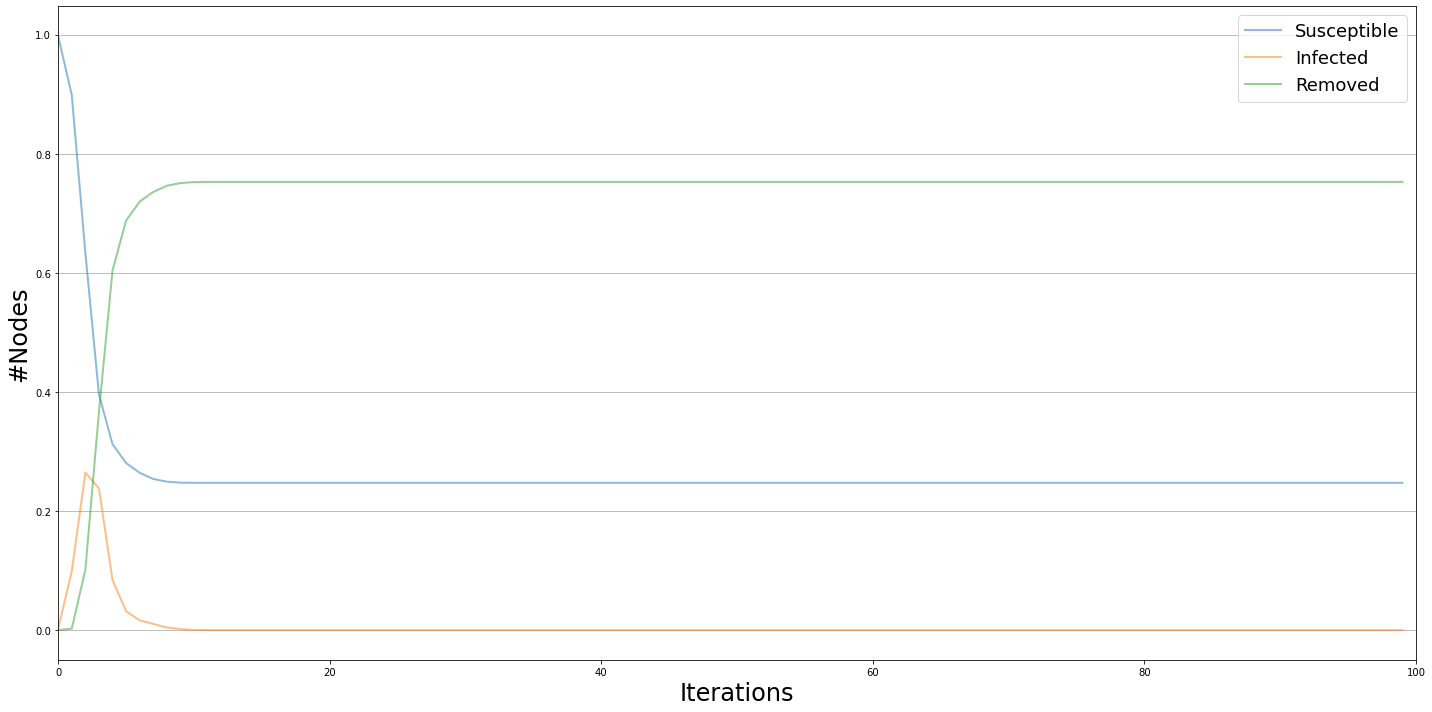

In [163]:
pr = nx.betweenness_centrality(G)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(G,infected_nodes)

[107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]


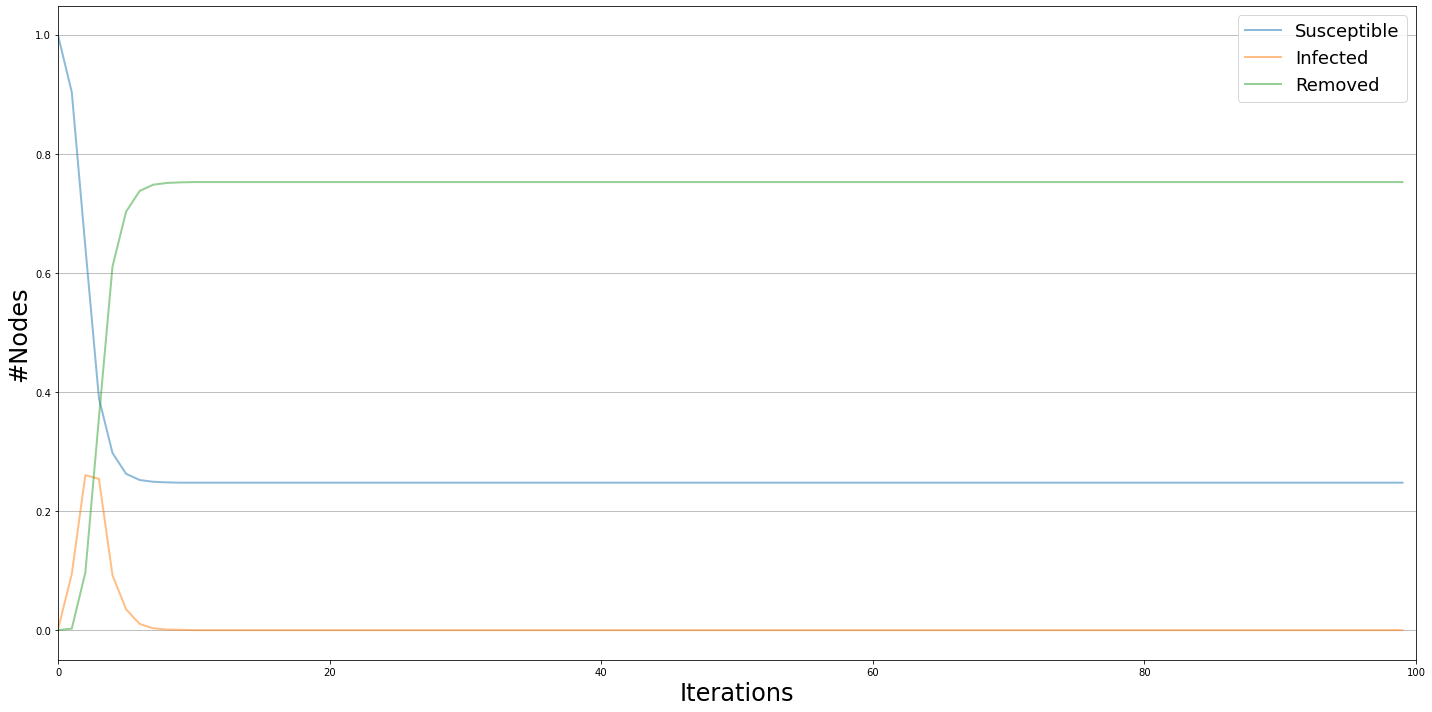

In [164]:
closeness=dict(nx.closeness_centrality(G))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(G,infected_nodes)

[107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663] 1045


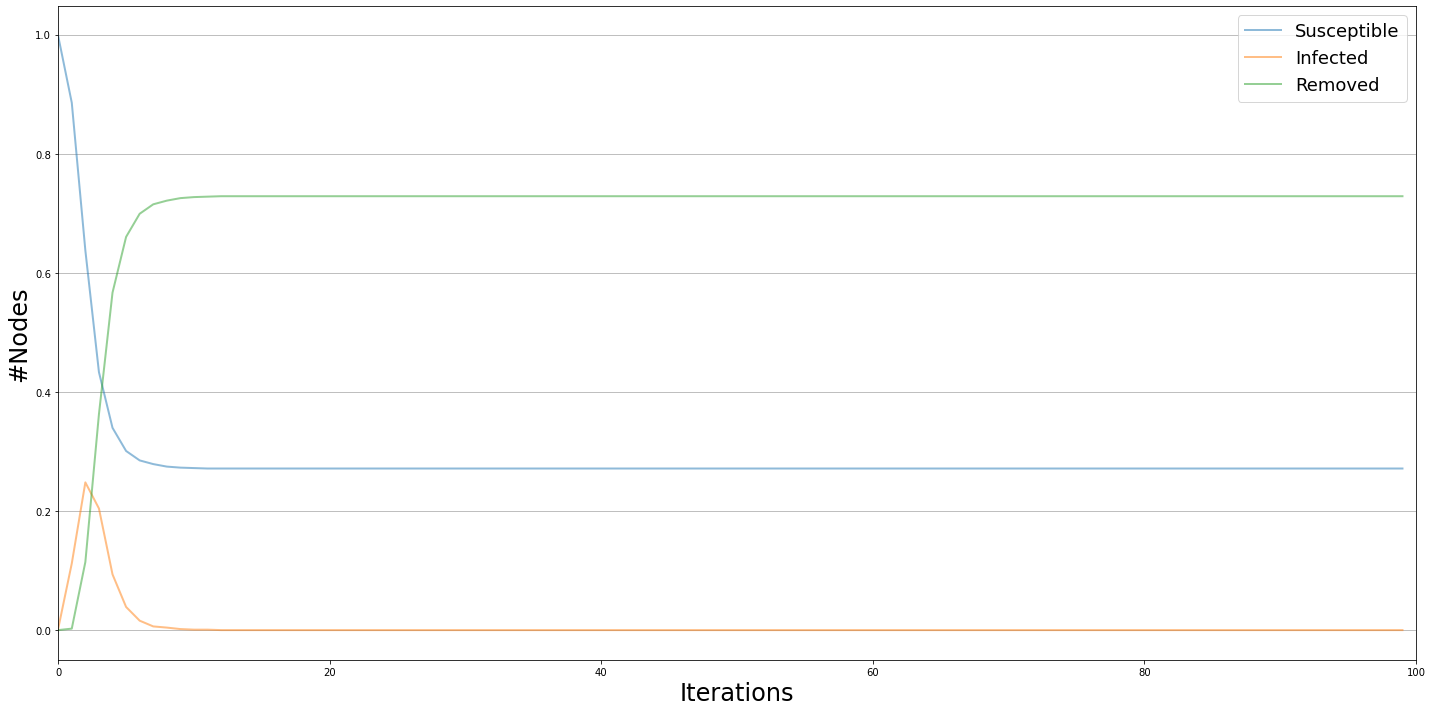

In [165]:
pr = dict(G.degree())
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes,G.degree(107))
simulation(G,infected_nodes)

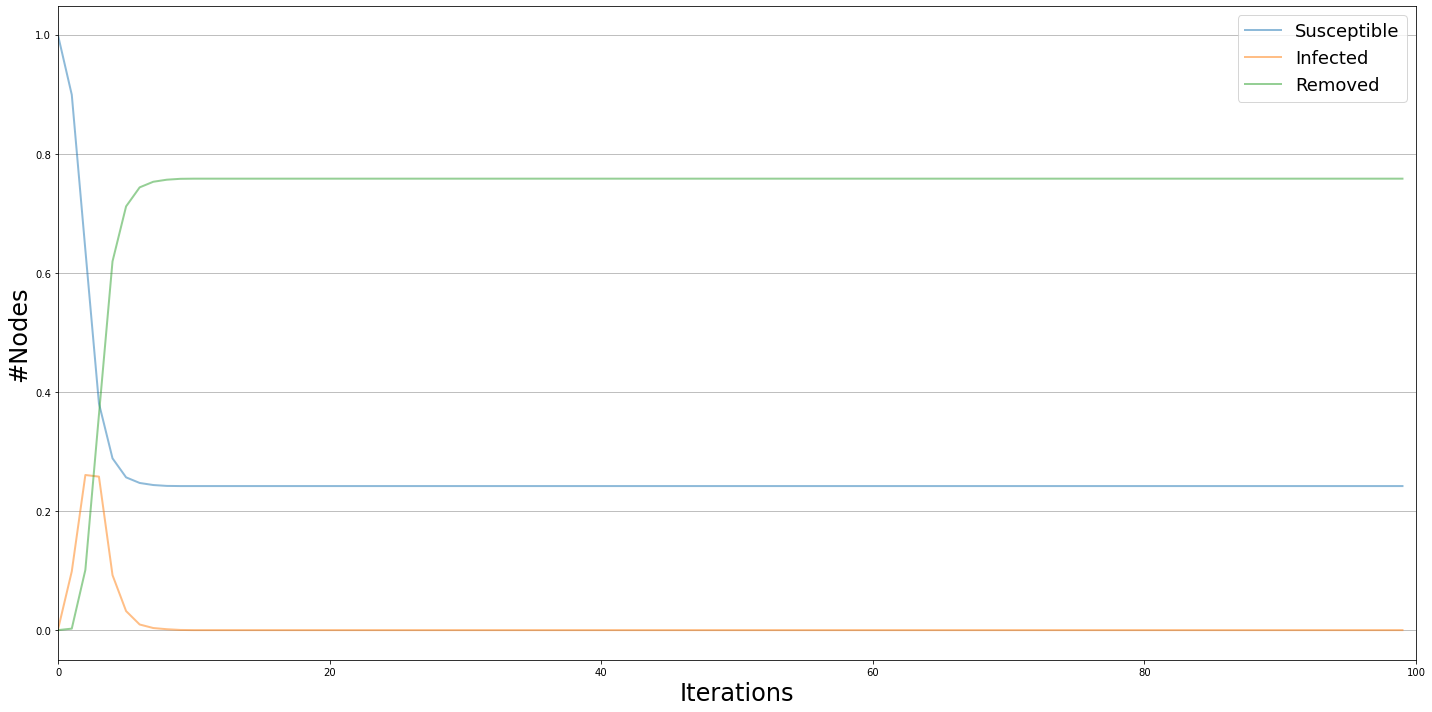

In [166]:
pr = nx.pagerank(G, alpha=0.8)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
simulation(G,infected_nodes)

[25, 23, 22, 29, 30, 27, 32, 31, 36, 38]


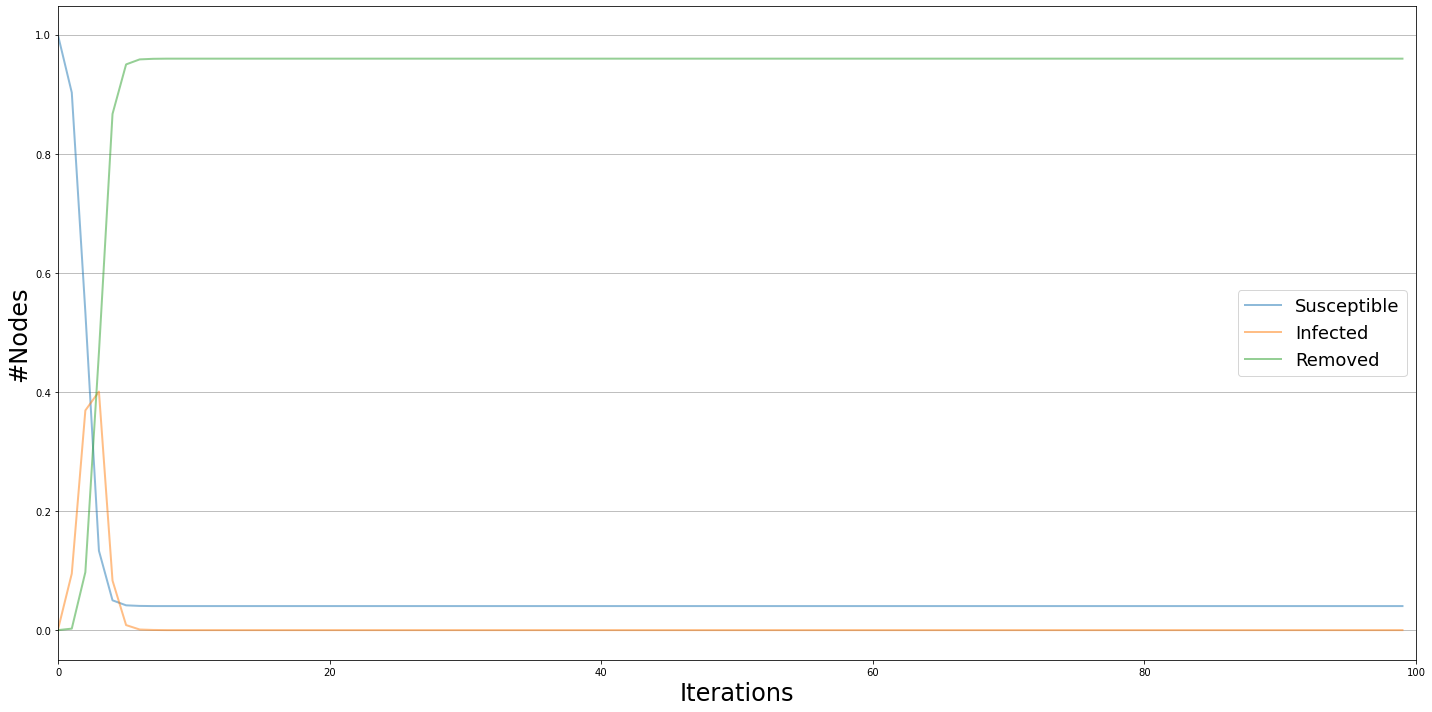

In [167]:
pr = nx.betweenness_centrality(V)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(V,infected_nodes)

[25, 23, 22, 27, 29, 30, 32, 31, 36, 40] 107


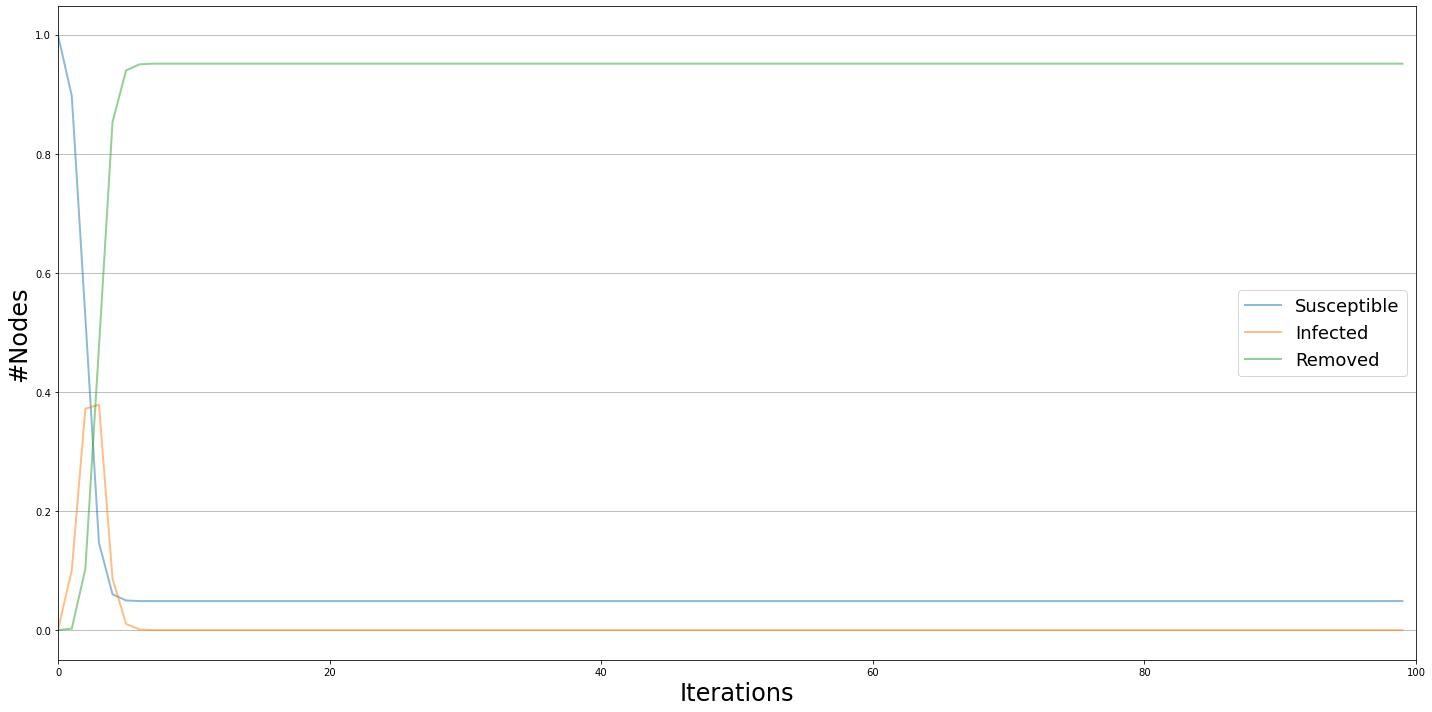

In [168]:
pr = dict(V.degree())
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes,G.degree(1864))
simulation(V,infected_nodes)

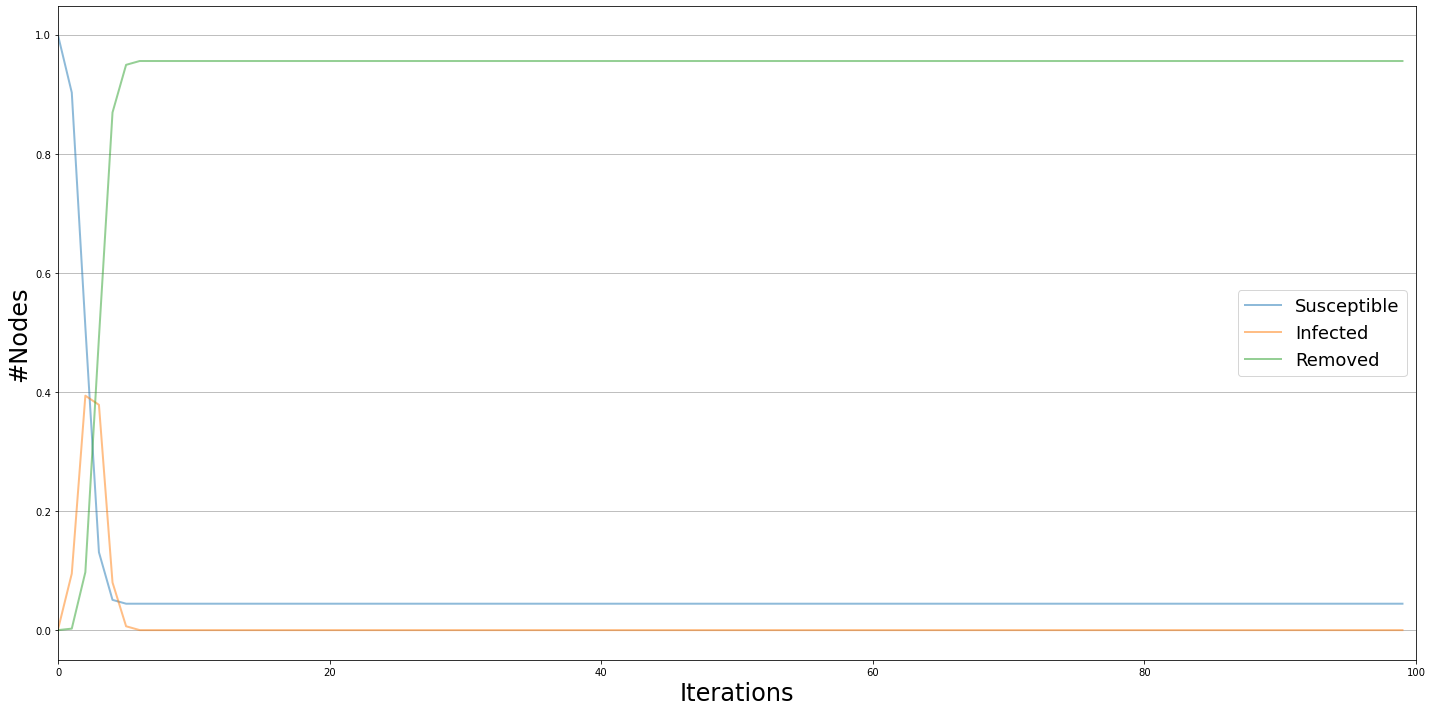

In [169]:
pr = nx.pagerank(V, alpha=0.8)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
simulation(V,infected_nodes)

[25, 23, 22, 29, 30, 27, 32, 31, 36, 40] 107


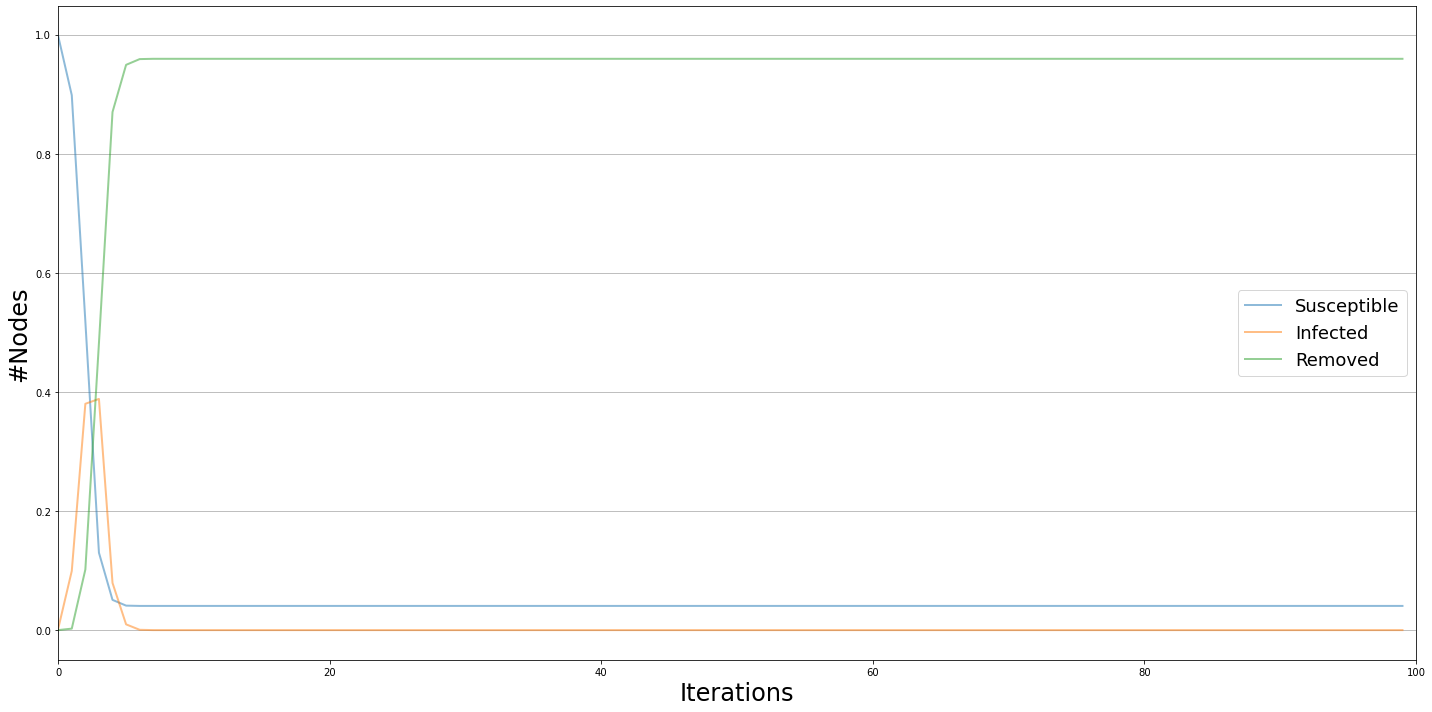

In [170]:
ecc=dict(nx.eccentricity(V))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes,G.degree(1864))
simulation(V,infected_nodes)

[25, 23, 22, 29, 30, 27, 32, 31, 36, 40]


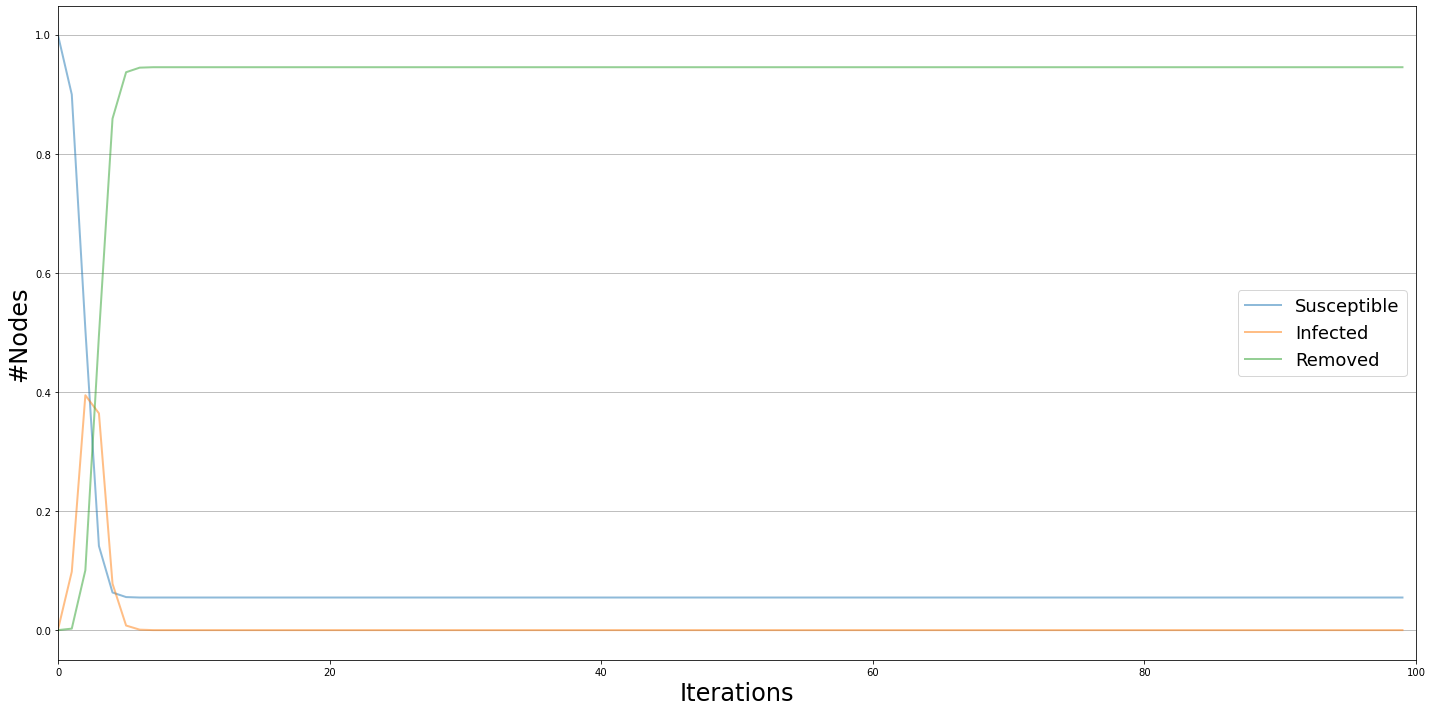

In [171]:
closeness=dict(nx.closeness_centrality(V))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(V,infected_nodes)

[3008, 5800, 1864, 4874, 191, 3576, 112, 2218, 4395, 1374]


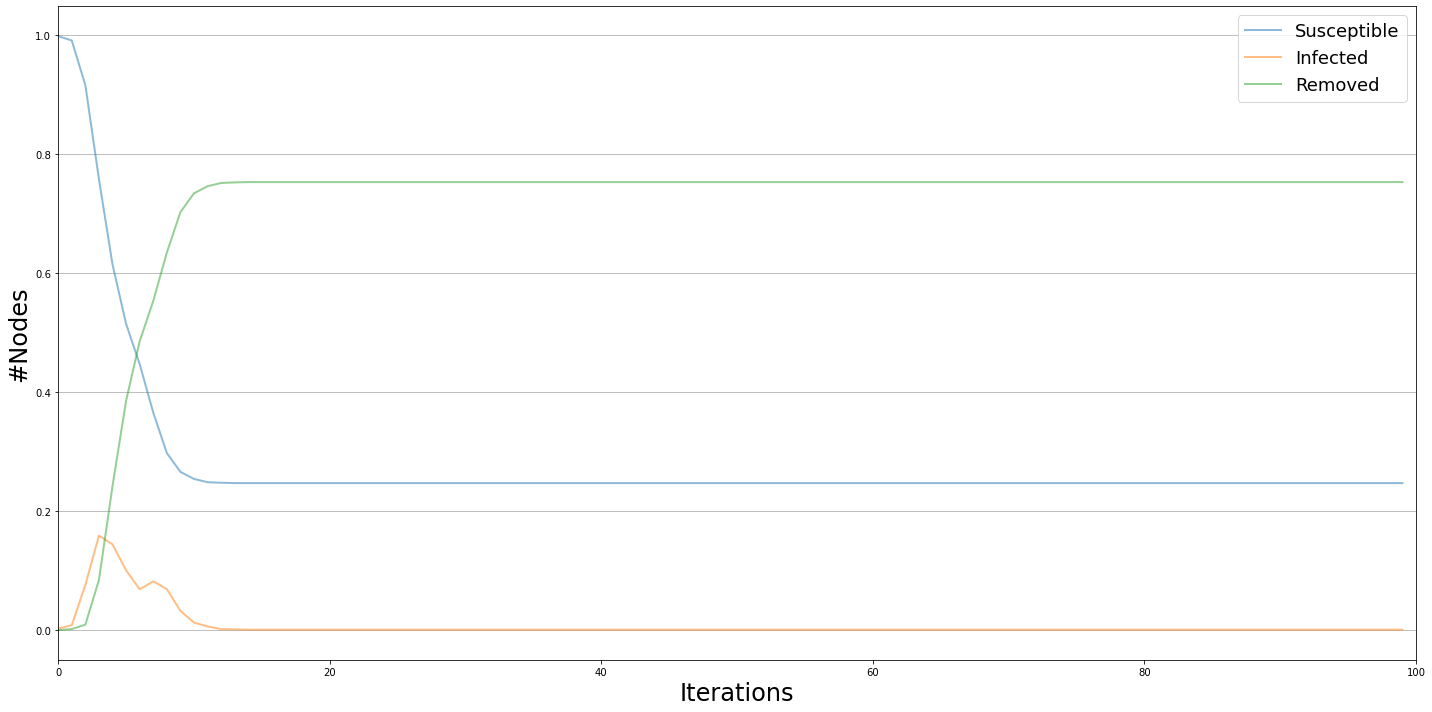

In [182]:
closeness=dict(nx.closeness_centrality(G))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(G,infected_nodes)

In [174]:
W=nx.read_edgelist('data/politician_edges_.txt',nodetype=int)

[5800, 1864, 3576, 2900, 1324, 3008, 1965, 4395, 191, 1836]


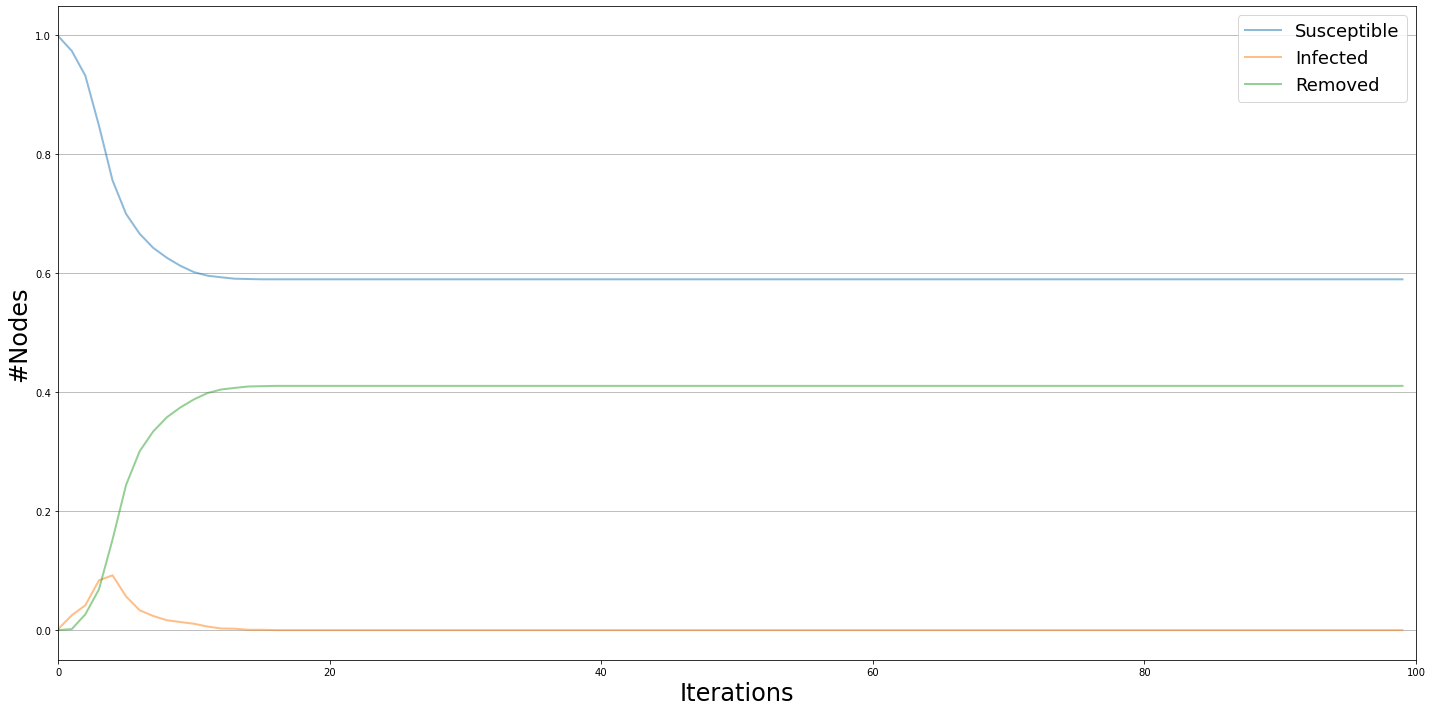

In [175]:
pr = nx.betweenness_centrality(W)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(W,infected_nodes)

[1864, 4874, 5800, 5416, 1595, 4602, 3576, 1474, 4032, 4972] 323


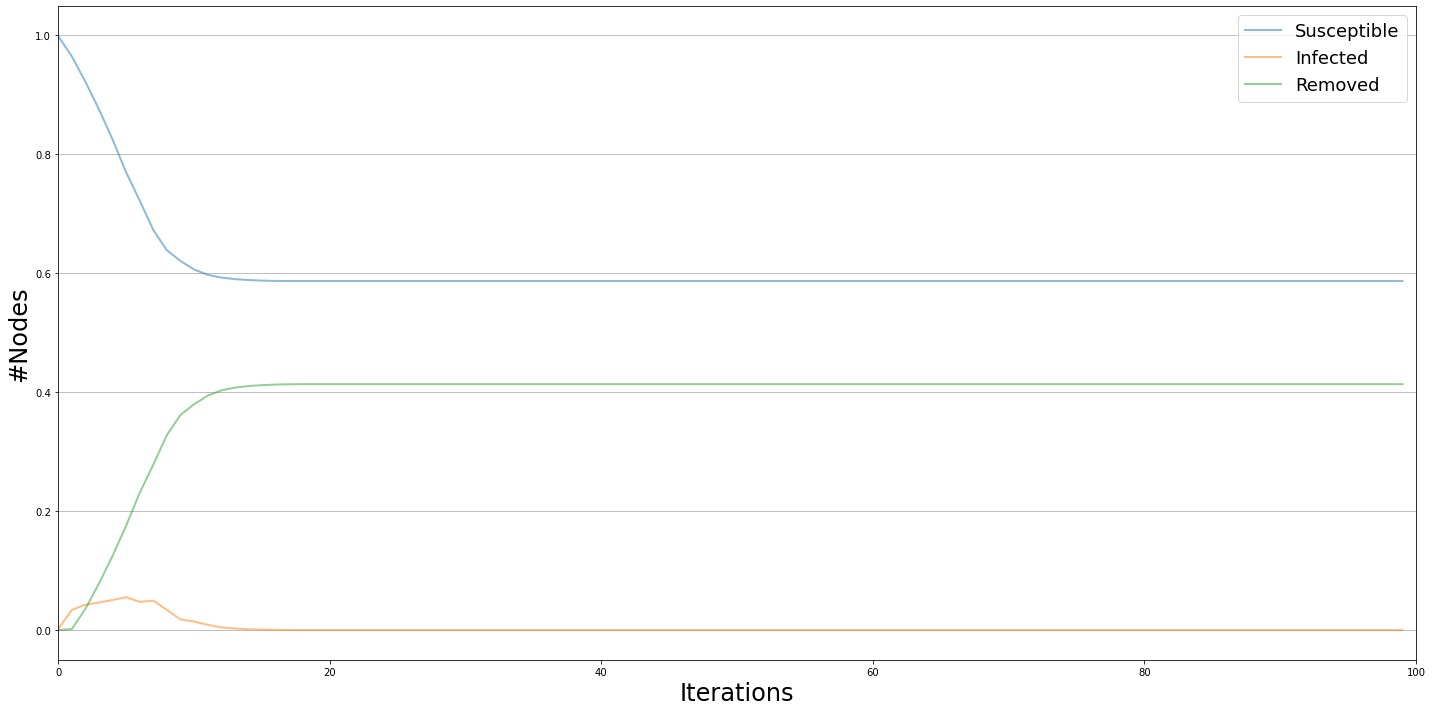

In [176]:
pr = dict(W.degree())
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes,W.degree(1864))
simulation(W,infected_nodes)

[1864, 4874, 5800, 5416, 1595, 4602, 3576, 1474, 4032, 4972] 323


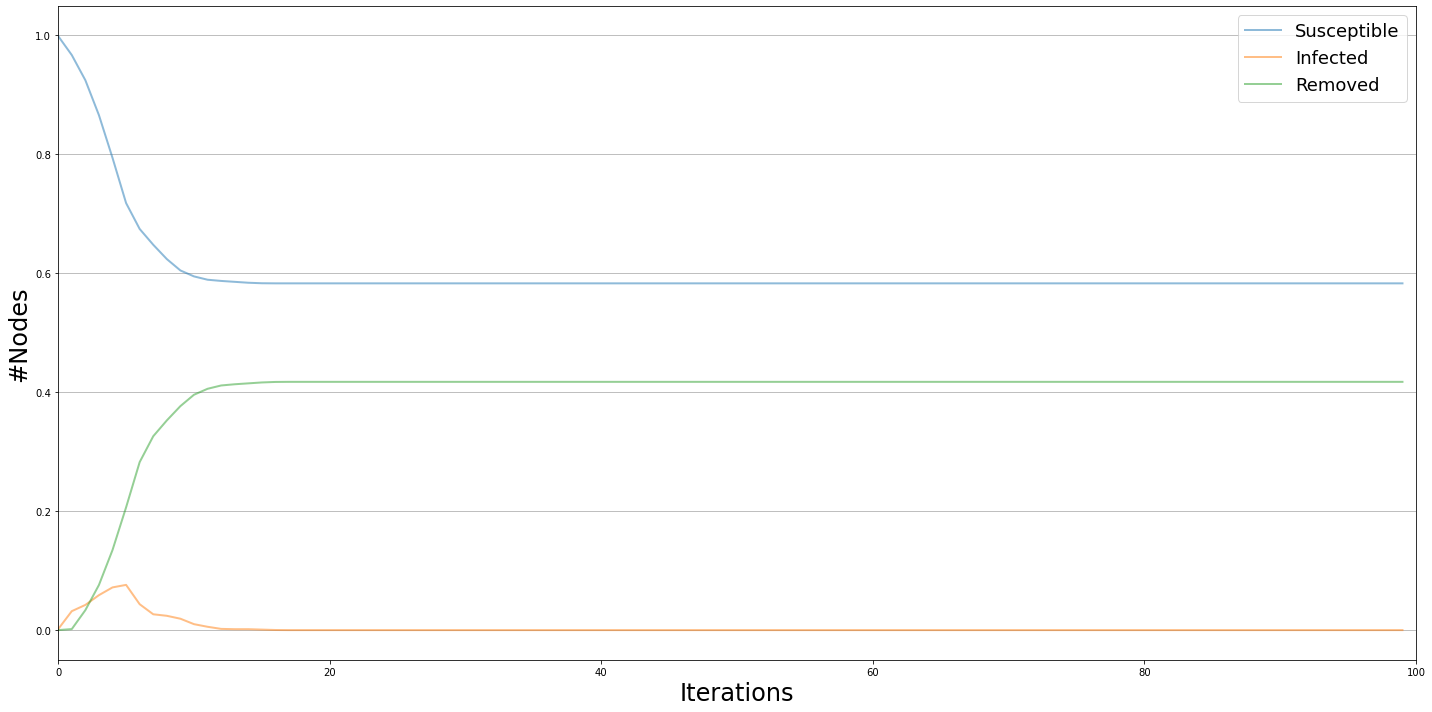

In [177]:
ecc=dict(nx.eccentricity(W))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes,W.degree(1864))
simulation(W,infected_nodes)

[1864, 4874, 5800, 5416, 1595, 4602, 3576, 1474, 4032, 4972]


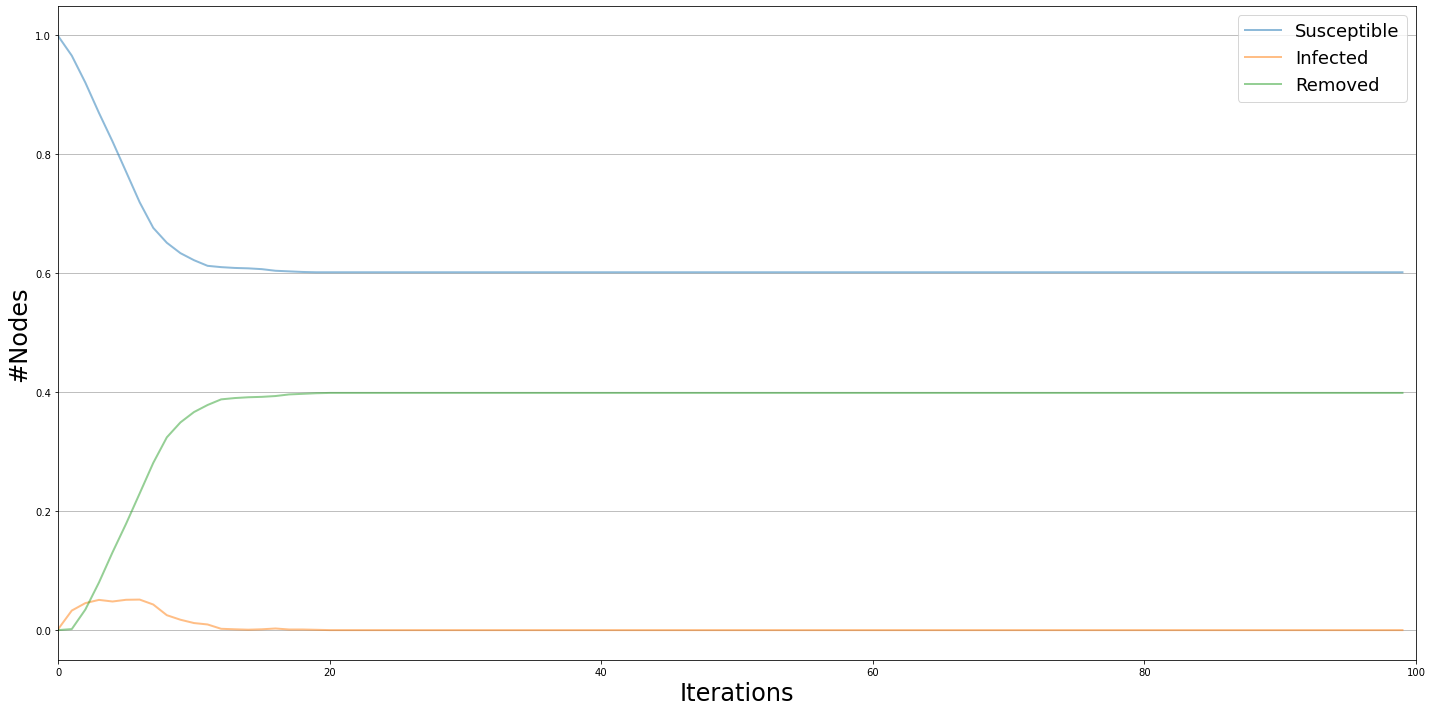

In [178]:
closeness=dict(nx.closeness_centrality(W))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(W,infected_nodes)

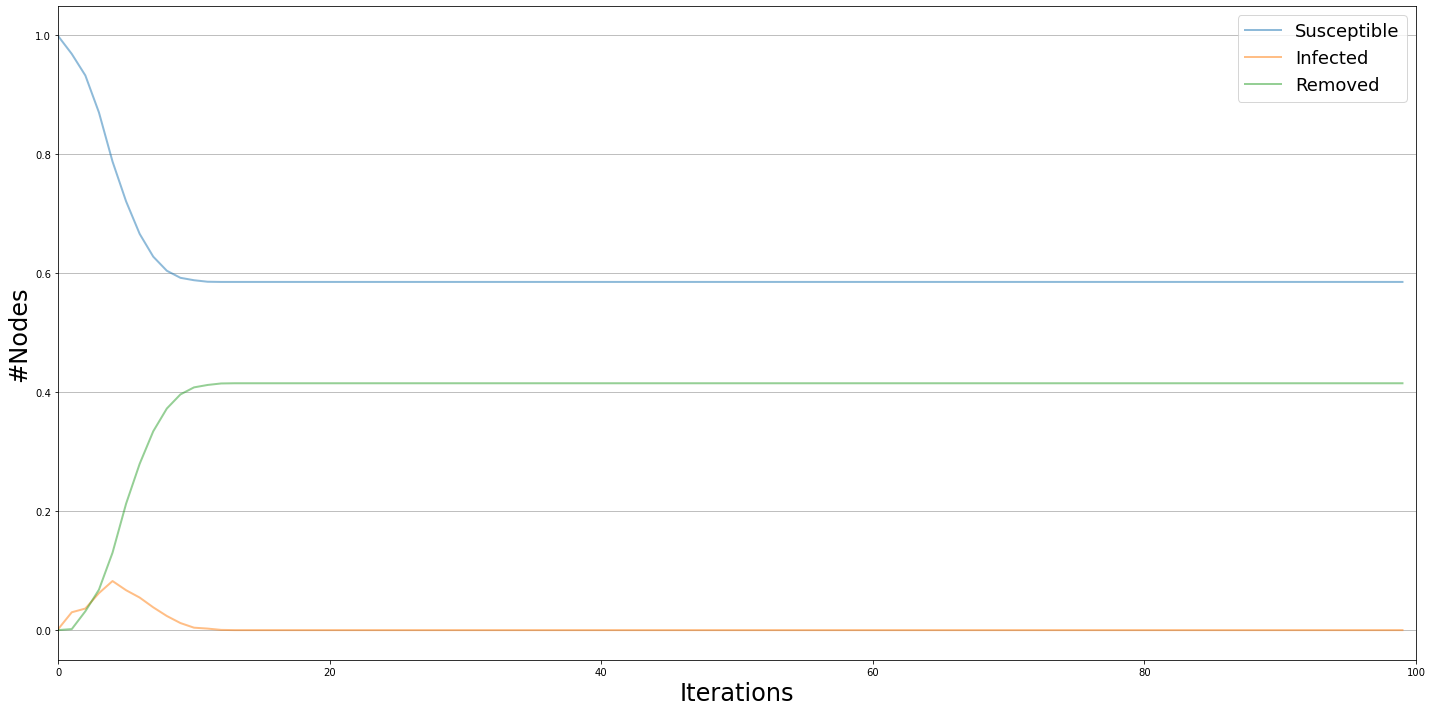

In [179]:
pr = nx.pagerank(W, alpha=0.8)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
simulation(W,infected_nodes)

[3008, 5800, 1864, 4874, 191, 3576, 112, 2218, 4395, 1374]


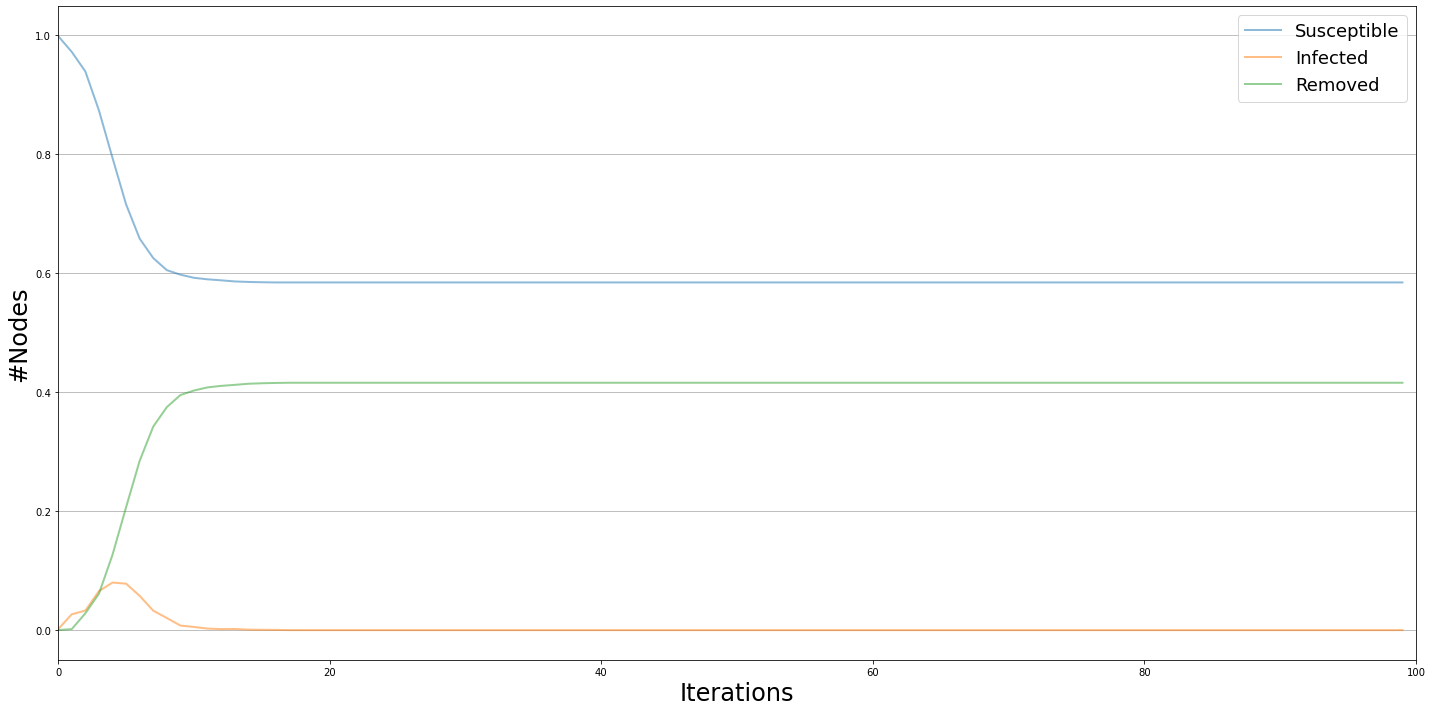

In [183]:
closeness=dict(nx.closeness_centrality(W))
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)
simulation(W,infected_nodes)